# sample_viewer.ipynb

Nicholsさんから頂いたサンプルイメージを表示する。

`ID = 16675`

`NAME = OEOW08FGQ`

`TIME = 2022-07-03T17:01:38:237000`

In [24]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import matplotlib.patches as patches
import astropy.io.fits as fits
from matplotlib.colors import LinearSegmentedColormap  # colormapをカスタマイズする
import pandas as pd
import ftpS3

# Color universal design
cud4 = ['#FF3300', '#FFF100', '#03AF7A', '#005AFF', '#4DC4FF', '#FF8082', '#F6AA00', '#990099', '#804000']
cud4bs = ['#FFCABF', '#FFFF80', '#D8F255', '#BFE4FF', '#FFCA80', '#77D9A8', '#C9ACE6', '#84919E']

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })

params = {
    # 'lines.markersize': 1,
    # 'lines.linewidth': 1,
    'axes.linewidth': 2,
    'xtick.major.size': 5,
    'xtick.minor.size': 3.5,
    'xtick.major.width': 2.0,
    'xtick.minor.width': 1.25,
    'ytick.major.size': 5,
    'ytick.minor.size': 3,
    'ytick.major.width': 2.0,
    'ytick.minor.width': 1.25,
}
plt.rcParams.update(params)

In [15]:
def generate_cmap(colors):
    """自分で定義したカラーマップを返す"""
    values = range(len(colors))

    vmax = np.ceil(np.max(values))
    color_list = []
    for v, c in zip(values, colors):
        color_list.append((v / vmax, c))
    return LinearSegmentedColormap.from_list('custom_cmap', color_list)

cmapBLUES = generate_cmap(['#000000','#010E5E','#042AA6','#0F7CE0','#1AC7FF','#FFFFFF'])

In [16]:
sample = fits.getdata('data/sample/jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits')
width = sample.shape[1]
print('WIDTH OF THE SAMPLE IMAGE IS', width, 'PX.')

WIDTH OF THE SAMPLE IMAGE IS 500 PX.


In [17]:
# 情報を見る (header)
data = fits.open('data/sample/jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits')
print(repr(data[0].header))
data.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
NEXTEND =                    3                                                  
DATE    = '2022-07-03'                                                          
FILENAME= 'oeow08fgq_raw_30_0020.fits'                                          
FILETYPE= 'SCI     '                                                            
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
EQUINOX =               2000.0                                                  
ROOTNAME= 'oeow08fgq'                                                           
PRIMESI = 'STIS    '        

In [18]:
data[0].header['DATE']

'2022-07-03'

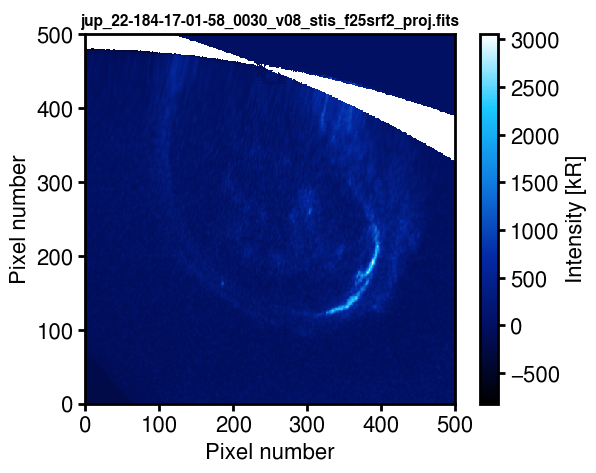

In [19]:
fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits', weight='bold', fontsize=11)
ax.set_xlabel('Pixel number', fontsize=16)
ax.set_ylabel('Pixel number', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
cs = ax.pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
# cs = ax.contourf(sample, 200, vmin=0, vmax=1000, cmap=cmapBLUES)
pp = fig.colorbar(cs)
pp.ax.set_title(' ', fontsize=16)
pp.set_label('Intensity [kR]', fontsize=16)
pp.ax.tick_params(labelsize=16)
plt.show()

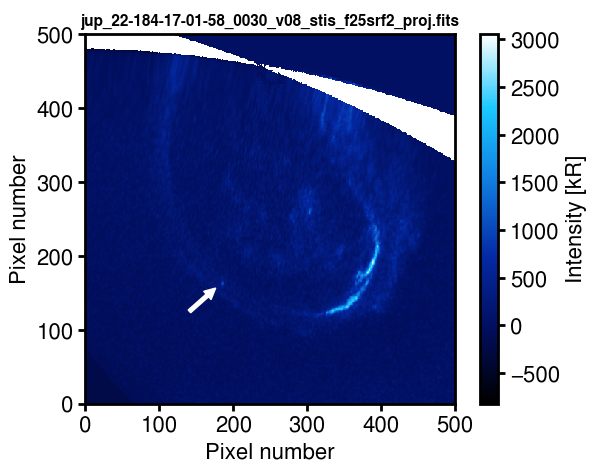

In [20]:
x0 = 178
y0 = 158
r0 = np.sqrt(x0**2 + y0**2)
phi = np.arctan2(y0,x0)
dx0 = 50*np.cos(phi)
dy0 = 50*np.sin(phi)

fig, ax = plt.subplots(dpi=100)
ax.set_aspect('equal')
ax.set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits', weight='bold', fontsize=11)
ax.set_xlabel('Pixel number', fontsize=16)
ax.set_ylabel('Pixel number', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.arrow(x=x0-dx0, y=y0-dy0, dx=dx0*0.95, dy=dy0*0.95,
         width=5, head_width=15, head_length=15, length_includes_head=True, 
         color='#FFFFFF', zorder=1
         )
cs = ax.pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES, zorder=0.5)
# cs = ax.contourf(sample, 200, vmin=0, vmax=1000, cmap=cmapBLUES)
pp = fig.colorbar(cs)
pp.ax.set_title(' ', fontsize=16)
pp.set_label('Intensity [kR]', fontsize=16)
pp.ax.tick_params(labelsize=16)
plt.show()

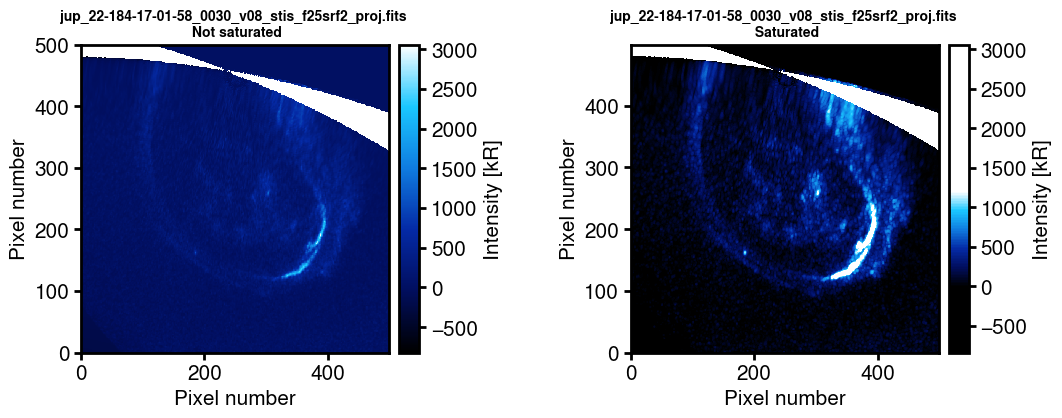

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(13,4), dpi=100)
ax[0].set_aspect('equal')
ax[0].set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits \n Not saturated', weight='bold', fontsize=10)
ax[0].set_xlabel('Pixel number', fontsize=15)
ax[0].set_ylabel('Pixel number', fontsize=15)
ax[0].tick_params(axis='x', labelsize=15)
ax[0].tick_params(axis='y', labelsize=15)
cs = ax[0].pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
axpos = ax[0].get_position()
pp_ax = fig.add_axes(
    [axpos.x1+axpos.height*0.01, axpos.y0, axpos.height*0.02, axpos.height])  # カラーバーのaxesを追加
pp = fig.colorbar(cs, cax=pp_ax, ticks=np.arange(-500,3001,500))
pp.ax.set_title(' ', fontsize=15)
pp.set_label('Intensity [kR]', fontsize=15)
pp.ax.tick_params(labelsize=15)

ax[1].set_aspect('equal')
ax[1].set_title('jup_22-184-17-01-58_0030_v08_stis_f25srf2_proj.fits \n Saturated', weight='bold', fontsize=10)
ax[1].set_xlabel('Pixel number', fontsize=15)
ax[1].set_ylabel('Pixel number', fontsize=15)
ax[1].tick_params(axis='x', labelsize=15)
ax[1].tick_params(axis='y', labelsize=15)
# cs = ax[1].pcolormesh(sample, vmin=None, vmax=None, cmap=cmapBLUES)
cs = ax[1].contourf(sample, 200, vmin=0, vmax=1200, cmap=cmapBLUES)
axpos = ax[1].get_position()
pp_ax = fig.add_axes(
    [axpos.x1+axpos.height*0.01, axpos.y0, axpos.height*0.02, axpos.height])  # カラーバーのaxesを追加
pp = fig.colorbar(cs, cax=pp_ax, ticks=np.arange(-500,3001,500))
pp.ax.set_title(' ', fontsize=15)
pp.set_label('Intensity [kR]', fontsize=15)
pp.ax.tick_params(labelsize=15)

plt.show()

In [22]:
# 情報を見る (header)
data = fits.open('data/sample/jup_22-142-10-30-41_0030_v06_stis_f25srf2_flatproj.fits')
# print(repr(data[0].header))
print(data[0].header['DATE'])
print(data[0].header['TDATEOBS'])
print(data[0].header['TTIMEOBS'])
OBSDATE = data[0].header['TDATEOBS'] +'T'+ data[0].header['TTIMEOBS']
print(OBSDATE)
data.close()

2022-05-22
2022-05-22
10:30:41
2022-05-22T10:30:41


In [26]:
# 情報を見る (header)
data = fits.open('data/red3/EUROPA/2022/349_v23/jup_22-349-02-45-38_0030_v23_stis_f25srf2_flatproj.fits')
# data = fits.open('data/red/2022/271_v18/jup_22-271-21-12-52_0030_v18_stis_f25srf2_flatproj.fits')
print(repr(data[0].header))
data.close()

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
IJINXFLE= 'expaurarr_south_iinx_jinx.npz'                                       
NEXTEND =                    3                                                  
DATE    = '2022-12-15'                                                          
FILENAME= 'oez023xaq_raw_30_0070.fits'                                          
FILETYPE= 'SCI     '                                                            
TELESCOP= 'HST     '                                                            
INSTRUME= 'STIS    '                                                            
EQUINOX =               2000.0                                                  
ROOTNAME= 'oez023xaq'       

### FITSファイルの中身はどうなっているか

In [27]:
# 情報を見る (header)
data = fits.open('data/red/2014/006_v06/jup_14-006-02-35-58_0030_v06_stis_f25srf2_flatproj.fits')
# print(repr(data[1].header))
image = data[1].data.astype(np.float32)
print(image.shape)
# data.close()

(176669,)


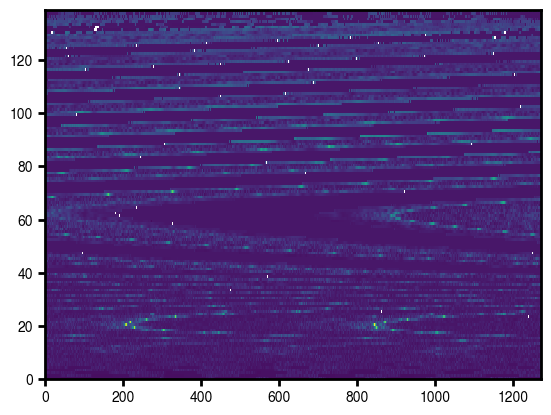

In [28]:
image2 = image.reshape(139, 1271)

fig, ax = plt.subplots()
ax.pcolormesh(image2)
plt.show()

ディスク内データのみを抽出しているので、検出器上の木星中心と視直径、px-km scale が足りない(空間分解能 km/px)→現状でディスクイメージに貼り付けることは不可能。

# Bonfond+2017 のデータを見る

In [29]:
bon17_efp = np.loadtxt('/Users/shin/Documents/Research/Jupiter/Codes/HST/data/Bonfond_etal_2017/jgra53671-sup-0006-DataSetS3.txt',
           skiprows=1,
           usecols=(3,4,5))
print(bon17_efp[:,1])

[129.952 130.184 131.435 132.672 133.081 133.702 134.15  135.568 135.935
 136.499 125.709 126.625 139.794 140.108 140.958 141.604 142.69  142.764
 143.595 144.147 144.766 145.669 145.893 146.528 146.945 147.743 148.344
 154.592 155.072 155.445 156.114 156.685 157.422 157.883 189.876 140.835
 141.766 143.066 145.115 145.506 146.186 147.675 149.653 150.053 138.991
 139.202 139.919 141.379 141.806 142.534 142.514 143.269 143.975 143.9
 144.377 144.851 145.83  146.696 146.639 147.614 148.585 148.722 136.072
 138.757 150.871 151.021 152.776 153.237 153.595 154.406 156.673 157.466
 157.972 158.416 159.016 159.519 134.22  135.719 136.163 137.585 152.022
 152.296 152.317 152.877 153.67  154.12  154.568 143.605 143.985 144.714
 144.921 144.953 144.358 145.16  145.332 145.534 146.272 146.474 147.254
 150.501 150.811 151.129 150.851 151.609 151.517 151.875 152.232 152.469]


# 質量密度とカラム量

In [30]:
# ガウス積分 -inf < z < +inf
RJ = 71492E+3        # [m]   
AMU = 1.66E-27       # [kg]

ne_1 = 63            # 電子数密度 [cm-3] (Bagenal+2015)
ne_2 = 158           # 電子数密度 [cm-3] (Bagenal+2015)
ne_3 = 290           # 電子数密度 [cm-3] (Bagenal+2015)
Ai_1 = 18            # 平均イオン原子量 (Bagenal+2015)
Ai_2 = 18            # 平均イオン原子量 (Bagenal+2015)
Ai_3 = 18            # 平均イオン原子量 (Bagenal+2015)
Ti_1 = 340           # 平均イオン温度 [eV] (Bagenal+2015)
Ti_2 = 88            # 平均イオン温度 [eV] (Bagenal+2015)
Ti_3 = 48            # 平均イオン温度 [eV] (Bagenal+2015)
Zi_1 = 1.4           # 平均イオン価数 [q] (Bagenal+2015)
Zi_2 = 1.4           # 平均イオン価数 [q](Bagenal+2015)
Zi_3 = 1.4           # 平均イオン価数 [q](Bagenal+2015)
rho0_1 = 800         # プラズマ質量密度 [amu cm-3] (Bagenal+2015)
rho0_2 = 2000        # プラズマ質量密度 [amu cm-3] (Bagenal+2015)
rho0_3 = 3600        # プラズマ質量密度 [amu cm-3] (Bagenal+2015)
Hp0 = 0.64*RJ        # 基準スケールハイト [m] (Bagenal&Delamere2011)

Hp_1 = Hp0*math.sqrt(Ti_1/Ai_1)     # Scale height [m] (Bagenal&Delamere2011)
Hp_2 = Hp0*math.sqrt(Ti_2/Ai_2)     # Scale height [m] (Bagenal&Delamere2011)
Hp_3 = Hp0*math.sqrt(Ti_3/Ai_3)     # Scale height [m] (Bagenal&Delamere2011)

alpha1 = 1/(Hp_1**2)
I1 = rho0_1*(1E+6)*AMU*np.sqrt(np.pi/alpha1)

alpha2 = 1/(Hp_2**2)
I2 = rho0_2*(1E+6)*AMU*np.sqrt(np.pi/alpha2)

alpha3 = 1/(Hp_3**2)
I3 = rho0_3*(1E+6)*AMU*np.sqrt(np.pi/alpha3)

print(I1, I2, I3)
print(I1/I1, I2/I1, I3/I1)

4.680730514300455e-10 5.95326924054113e-10 7.914205299811761e-10
1.0 1.2718675476729209 1.6908055859299038


In [31]:
# カラム量と温度を決めて、中心質量密度を求める
Ncol = 1.2E-9   # [kg m-3] Bagenal+2015比、1桁多
Ncol *= (1E-6)/AMU

# Hot model (Ti = Ti_1)
rho1_1 = (Ncol/Hp0)*np.sqrt(Ai_1/(np.pi*Ti_1))
print(rho1_1)

# Medium model (Ti = Ti_2)
rho1_2 = (Ncol/Hp0)*np.sqrt(Ai_2/(np.pi*Ti_2))
print(rho1_2)

# Medium model (Ti = Ti_3)
rho1_3 = (Ncol/Hp0)*np.sqrt(Ai_3/(np.pi*Ti_3))
print(rho1_3)

2050.9619108962393
4031.3983846997135
5458.539216947975


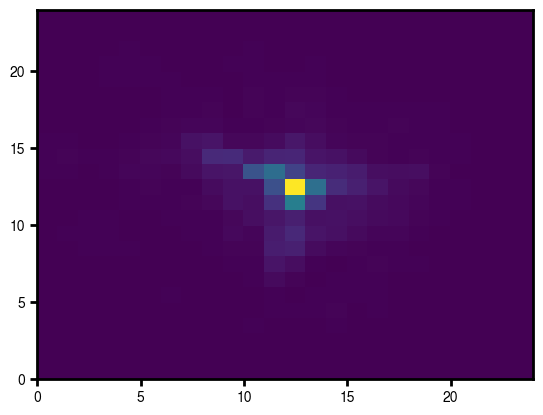

0.9985259
0.85170305


In [32]:
import astropy.io.fits as fits
img = fits.getdata('img/F25SRF2_230726.fits')

fig, ax = plt.subplots()
ax.pcolor(img[48:-48,48:-48])
plt.show()

print(np.sum(img))
print(np.sum(img[48:-48,48:-48]))

# EFP発光経度をEuropa公転面に直す

In [33]:
import ftpS3

hem = 'South'

refnum = 0
if hem == 'South':
    refnum = 1
satoval = np.recfromtxt('ref/2021je007055-sup-000'+str(3+refnum)+'-table si-s0'+str(2+refnum)+'.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

ave = 71.06
std = 0.389623632529527

# Plus
print(ftpS3.ftpS3().S3EQ(ave+std, satoval, 'EUROPA'))

# Average
print(ftpS3.ftpS3().S3EQ(ave, satoval, 'EUROPA'))

# Minus
print(ftpS3.ftpS3().S3EQ(ave-std, satoval, 'EUROPA'))

82.92146693592454
82.28896103896103
81.65645514199753


In [34]:
ave = 151.48901143567
std = 0.379074119431838

# Plus
print(ftpS3.ftpS3().S3EQ(ave+std, satoval, 'EUROPA'))

# Average
print(ftpS3.ftpS3().S3EQ(ave, satoval, 'EUROPA'))

# Minus
print(ftpS3.ftpS3().S3EQ(ave-std, satoval, 'EUROPA'))

174.08016958225264
173.81837806330802
173.55658654436337


# Deimos計算用

In [35]:
obs_hess11 = np.loadtxt('data/Hess2011_EFPpositions.txt', skiprows=1)
print(obs_hess11.shape)
h11_moonS3 = obs_hess11[:,0]
h11_efpNlon = obs_hess11[:,1]
h11_efpNlat = obs_hess11[:,2]
h11_efpSlon = obs_hess11[:,3]
h11_efpSlat = obs_hess11[:,4]

h11_efpNlonEQ = np.zeros(h11_efpNlon.shape)
for i in range(h11_efpNlonEQ.size):
    h11_efpNlonEQ[i] = ftpS3.ftpS3().S3EQ(h11_efpNlon[i], satoval, 'EUROPA')

(36, 5)


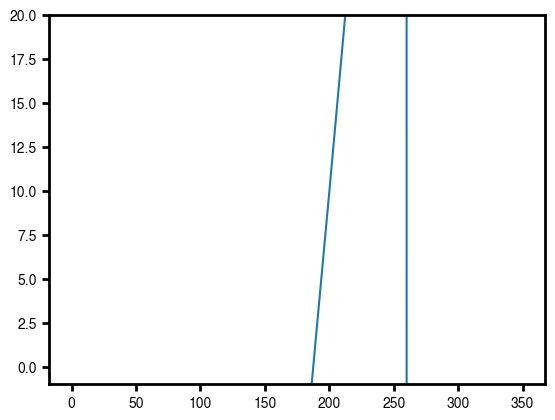

In [36]:
h11_leadA_N = h11_moonS3-h11_efpNlonEQ

plt.plot(h11_moonS3, h11_leadA_N)
plt.ylim(-1,20)
plt.show()

(2, 108)


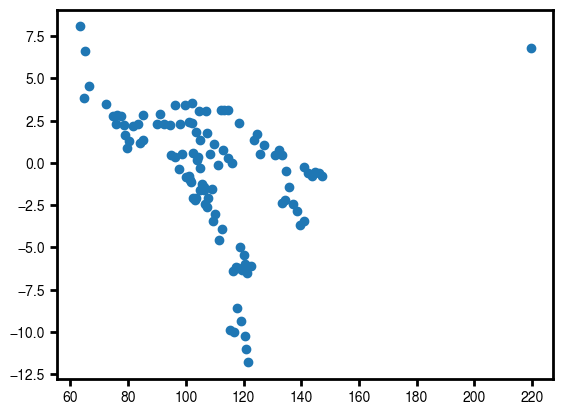

In [37]:
obs_bon17 = np.loadtxt('data/Bon17_leadangle.txt')
print(obs_bon17.shape)
b17_moonS3 = obs_bon17[0,:]
b17_efpNlon = obs_bon17[1,:]

b17_efpNlonEQ = np.zeros(b17_efpNlon.shape)
for i in range(b17_efpNlonEQ.size):
    b17_efpNlonEQ[i] = ftpS3.ftpS3().S3EQ(b17_efpNlon[i], satoval, 'EUROPA')

b17_leadA_N = b17_moonS3 - b17_efpNlon

plt.scatter(b17_moonS3, b17_leadA_N)
# plt.ylim(-20,20)
plt.show()

(108, 5)


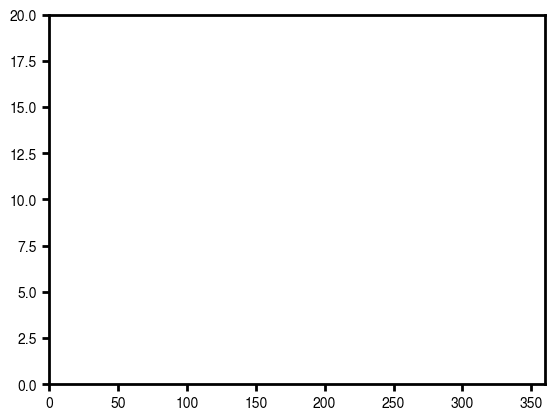

In [38]:
# Hue+2023 data
hue23_efpN = np.loadtxt('data/Hue23_EFP_north.txt',
           skiprows=2,
           usecols=(2,3,4,5,6))
print(hue23_efpN.shape)
h23_moonS3 = hue23_efpN[:,0]
h23_efpNlon = hue23_efpN[:,1]

h23_efpNlonEQ = np.zeros(h23_efpNlon.shape)
for i in range(h23_efpNlonEQ.size):
    h23_efpNlonEQ[i] = ftpS3.ftpS3().S3EQ(h23_efpNlon[i], satoval, 'EUROPA')

h23_leadA_N = h23_moonS3-h23_efpNlonEQ

plt.scatter(h23_moonS3, h23_leadA_N)
plt.xlim(0,360)
plt.ylim(0,20)
plt.show()

0                PJ01        
1                PJ01        
2                PJ01        
3                PJ03        
4                PJ03        
                ...          
259              PJ41        
260              PJ41        
261              PJ42        
262              PJ42        
263              PJ42        
Name: PJ, Length: 264, dtype: object
                        PJ                      UTC_TIME  Moon_SIII_LON  \
58            PJ12           2018-04-01T10:43:15                  89.77   
59            PJ12           2018-04-01T10:44:16                  90.32   

    FP_LON  FP_LAT  FP_LON_ERR  FP_LAT_ERR  EMISSION_ANGLE  
58   74.01  -64.61        0.24        0.39           52.63  
59   74.42  -64.68        0.23        0.39           52.06  


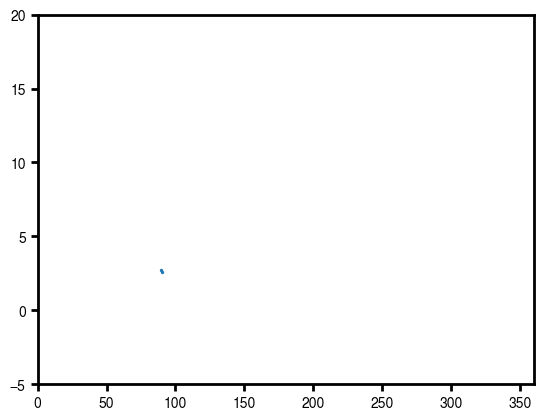

[0.20689655 0.20689655 0.2183908  0.2294686  0.2173913  0.20548947
 0.20581114 0.1937046  0.1937046  0.18159806 0.18159806 0.18159806
 0.18159806 0.16949153 0.16990291 0.16990291 0.18203883 0.18203883
 0.18203883 0.19417476 0.20731707 0.2195122  0.2195122  0.2195122
 0.23117322 0.10330579 0.10330579 0.11363636 0.11363636 0.12875536
 0.12875536 0.15521064 0.20881671 0.20881671 0.20881671 0.22041763
 0.22041763 0.27315914 0.27315914 0.27315914 0.10391198 0.09779951
 0.07398874 0.08354669 0.09668508 0.10359116 0.09247842 0.29220779
 0.29220779 0.32051282 0.32051282 0.35493827 0.35493827 0.35493827
 0.35159155 0.36144578 0.21400778 0.21400778 0.38709677 0.37096774
 0.2560241  0.24588149 0.24781341 0.33236994 0.31791908 0.21806854
 0.21806854 0.25477707 0.25498254 0.25806452 0.27419355 0.22041763
 0.22041763 0.23201856 0.29238861 0.3125     0.3125     0.2804878
 0.2804878  0.28042861 0.27912621 0.27912621 0.27912621 0.27912621
 0.27912621 0.27912621 0.28915663 0.38961039 0.38961039 0.370967

In [61]:
hem = 'South'

refnum = 0
if hem == 'South':
    refnum = 1
satoval = np.recfromtxt('ref/2021je007055-sup-000'+str(3+refnum)+'-table si-s0'+str(2+refnum)+'.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

pdcsv = pd.read_csv('data/Hue23_EFP_south.txt', skiprows=2,
                    names=['PJ','UTC_TIME','Moon_SIII_LON','FP_LON','FP_LAT','FP_LON_ERR','FP_LAT_ERR','EMISSION_ANGLE'], sep='\t')
print(pdcsv['PJ'])
# print(pdcsv['PJ'].str.contains('PJ07'))

# Specify PJ number
PJnum = 'PJ12'
PJdata = pdcsv[pdcsv['PJ'].str.contains(PJnum)]
print(PJdata)

h23_moonS3 = np.array(PJdata['Moon_SIII_LON'])
h23_efpNlon = np.array(PJdata['FP_LON'])

h23_efpNlonEQ = np.zeros(h23_efpNlon.shape)
for i in range(h23_efpNlonEQ.size):
    h23_efpNlonEQ[i] = ftpS3.ftpS3().S3EQ(h23_efpNlon[i], satoval, 'EUROPA')

h23_leadA_N = h23_moonS3-h23_efpNlonEQ

plt.scatter(h23_moonS3, h23_leadA_N, s=2)
plt.xlim(0,360)
plt.ylim(-5,20)
plt.show()

# PJ10_data = np.array([h23_moonS3, h23_leadA_N])
# np.savetxt('data/Hue23_EFP_n_PJ10.txt', PJ10_data)

h23_moonS3 = np.array(pdcsv['Moon_SIII_LON'])
h23_efpNlon = np.array(pdcsv['FP_LON'])
h23_efpNlon_err = np.array(pdcsv['FP_LON_ERR'])

h23_efpNlonEQ = np.zeros(h23_efpNlon.shape)
h23_efpNlonEQ_p = np.zeros(h23_efpNlon.shape)
h23_efpNlonEQ_m = np.zeros(h23_efpNlon.shape)
for i in range(h23_efpNlonEQ.size):
    h23_efpNlonEQ[i] = ftpS3.ftpS3().S3EQ(h23_efpNlon[i], satoval, 'EUROPA')
    h23_efpNlonEQ_p[i] = ftpS3.ftpS3().S3EQ(h23_efpNlon[i]+h23_efpNlon_err[i], satoval, 'EUROPA')
    h23_efpNlonEQ_m[i] = ftpS3.ftpS3().S3EQ(h23_efpNlon[i]-h23_efpNlon_err[i], satoval, 'EUROPA')

h23_leadA_N = h23_moonS3-h23_efpNlonEQ
h23_leadA_N_p = h23_moonS3-h23_efpNlonEQ_p
h23_leadA_N_m = h23_moonS3-h23_efpNlonEQ_m

print(h23_leadA_N-h23_leadA_N_p)
print(h23_leadA_N_m-h23_leadA_N)
pdcsv['EQ_LEAD_ANGLE'] = h23_leadA_N
pdcsv['EQ_LEAD_ANGLE_ERR'] = 0.5*((h23_leadA_N-h23_leadA_N_p)+(h23_leadA_N_m-h23_leadA_N))

In [40]:
print(pdcsv)
# pdcsv.to_csv('data/Hue23_EFP_south2.txt')

                         PJ                      UTC_TIME  Moon_SIII_LON  \
0              PJ01           2016-08-27T14:04:30                  25.11   
1              PJ01           2016-08-27T14:05:32                  25.66   
2              PJ01           2016-08-27T14:06:33                  26.21   
3              PJ03           2016-12-11T17:51:10                 318.00   
4              PJ03           2016-12-11T17:52:11                 318.54   
..                      ...                           ...            ...   
259            PJ41           2022-04-09T17:27:22                 162.63   
260            PJ41           2022-04-09T17:31:26                 164.80   
261            PJ42           2022-05-23T03:39:07                  84.79   
262            PJ42           2022-05-23T03:40:07                  85.33   
263            PJ42           2022-05-23T03:42:08                  86.40   

     FP_LON  FP_LAT  FP_LON_ERR  FP_LAT_ERR  EMISSION_ANGLE  EQ_LEAD_ANGLE  \
0     26.

# Bonfond+2017データ やりなおし

In [41]:
# Set legend shadow
def legend_shadow(fig, ax, legend, dx, dy):

  frame = legend.get_window_extent()

  xmin, ymin = fig.transFigure.inverted().transform((frame.xmin, frame.ymin))
  xmax, ymax = fig.transFigure.inverted().transform((frame.xmax, frame.ymax))

  # plot patch shadow
  rect = patches.Rectangle((xmin+dx, ymin+dy), xmax-xmin, ymax-ymin, 
                          transform=fig.transFigure,
                          edgecolor='k', facecolor='k',
                          clip_on=False)
  ax.add_patch(rect)

  return None

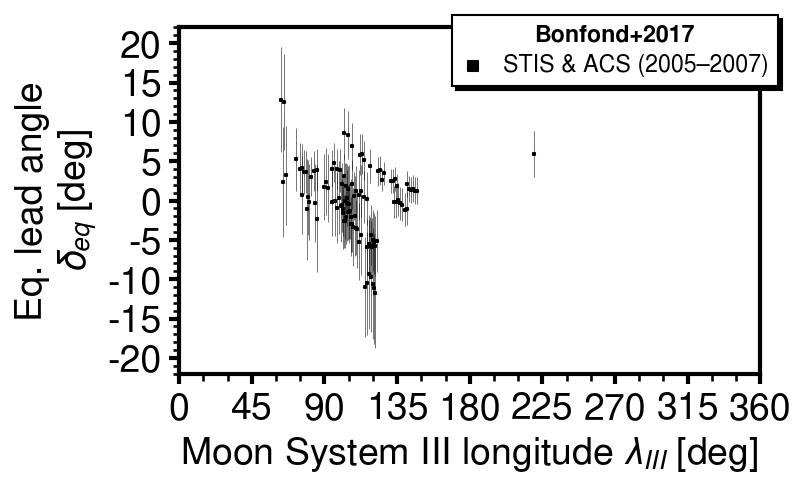

In [42]:
hem = 'North'

refnum = 0
if hem == 'South':
    refnum = 1
satoval = np.recfromtxt('ref/2021je007055-sup-000'+str(3+refnum)+'-table si-s0'+str(2+refnum)+'.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

BON17 = pd.read_csv('data/Bonfond_etal_2017/jgra53671-sup-0006-DataSetS3.txt', skiprows=1,
                    names=['ROOTNAME','UTC_DAY','UTC_TIME','EUR_LON',
                           'FP_LON','FP_LAT','FP_LON_ERR_P','FP_LON_ERR_M','FP_LAT_ERR_P','FP_LAT_ERR_M'], sep='\t')

# Specify date
DateName = '03/05/2007'
# BON17 = BON17[BON17['UTC_DAY'].str.contains(DateName)]

b17_moonS3 = np.array(BON17['EUR_LON'])
b17_efplon = np.array(BON17['FP_LON'])
b17_efplonP = np.array(BON17['FP_LON_ERR_P'])
b17_efplonM = np.array(BON17['FP_LON_ERR_M'])

b17_efplonEQ = np.zeros(b17_efplon.shape)
b17_efplonEQP = np.zeros(b17_efplon.shape)
b17_efplonEQM = np.zeros(b17_efplon.shape)
for i in range(b17_efplonEQ.size):
    b17_efplonEQ[i] = ftpS3.ftpS3().S3EQ(b17_efplon[i], satoval, 'EUROPA')
    b17_efplonEQP[i] = ftpS3.ftpS3().S3EQ(b17_efplonP[i], satoval, 'EUROPA')
    b17_efplonEQM[i] = ftpS3.ftpS3().S3EQ(b17_efplonM[i], satoval, 'EUROPA')

b17_leadA = b17_moonS3-b17_efplonEQ
b17_leadAP = b17_moonS3-b17_efplonEQP
b17_leadAM = b17_moonS3-b17_efplonEQM

fsize=18
fig, ax = plt.subplots(figsize=(5,3), dpi=150)
ax.tick_params(axis='x', labelsize=fsize)
ax.tick_params(axis='y', labelsize=fsize)
ax.set_xlim(0,360)
ax.set_ylim(-22.05,22)
ax.set_xlabel('Moon System III longitude $\\lambda_{III}$ [deg]', fontsize=fsize)
ax.set_ylabel('Eq. lead angle\n$\delta_{eq}$ [deg]', fontsize=fsize)
ax.set_xticks(np.arange(0, 361, 45))
ax.set_xticklabels(np.arange(0, 361, 45), fontsize=fsize)
ax.xaxis.set_minor_locator(AutoMinorLocator(3))  # minor ticks
ax.set_yticks(np.arange(-20, 21, 5))
ax.set_yticklabels(np.arange(-20, 21, 5))
ax.yaxis.set_minor_locator(AutoMinorLocator(5))  # minor ticks
ax.scatter(b17_moonS3, b17_leadA, color='k', marker=',', s=0.8, label='STIS & ACS (2005–2007)')
ax.errorbar(b17_moonS3, b17_leadA, yerr=0.5*(b17_leadAM-b17_leadAP), color='k', linestyle='none', elinewidth=0.25, marker='none',)

legend1 = ax.legend(loc='upper right',
                    markerscale=5,
                    bbox_to_anchor=(1.05, 1.07),
                    fancybox=False,
                    facecolor='white',
                    framealpha=1,
                    edgecolor='k',
                    fontsize=fsize*0.62,
                    labelspacing=0.34,
                    handlelength=1,)
legend1.set_title('Bonfond+2017', prop={'size': fsize*0.62, 'weight': 'bold'})
legend_shadow(fig, ax, legend1, dx=0.006, dy=-0.0085)

plt.show()

In [43]:
print(pdcsv)

                         PJ                      UTC_TIME  Moon_SIII_LON  \
0              PJ01           2016-08-27T14:04:30                  25.11   
1              PJ01           2016-08-27T14:05:32                  25.66   
2              PJ01           2016-08-27T14:06:33                  26.21   
3              PJ03           2016-12-11T17:51:10                 318.00   
4              PJ03           2016-12-11T17:52:11                 318.54   
..                      ...                           ...            ...   
259            PJ41           2022-04-09T17:27:22                 162.63   
260            PJ41           2022-04-09T17:31:26                 164.80   
261            PJ42           2022-05-23T03:39:07                  84.79   
262            PJ42           2022-05-23T03:40:07                  85.33   
263            PJ42           2022-05-23T03:42:08                  86.40   

     FP_LON  FP_LAT  FP_LON_ERR  FP_LAT_ERR  EMISSION_ANGLE  EQ_LEAD_ANGLE  \
0     26.